In [7]:
import os
import random
import cv2
from tqdm import tqdm
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense,Activation,Flatten, Conv2D, MaxPooling2D,BatchNormalization,Dropout
from keras.optimizers import SGD, Adam, RMSprop
from keras import models, layers, optimizers
%matplotlib inline
random.seed(180)

In [8]:
traindir = 'I:\Deep Learning data\Face Mask Dataset\Train'
val_dir = 'I:\Deep Learning data\Face Mask Dataset\Validation'
test_dir = 'I:\Deep Learning data\Face Mask Dataset\Test'

In [9]:
my_list = os.listdir(traindir)

In [10]:
print("Total number of classes detected:" ,len(my_list))
no_of_classes = len(my_list)
print(my_list)

Total number of classes detected: 2
['WithMask', 'WithoutMask']


Images With Mask


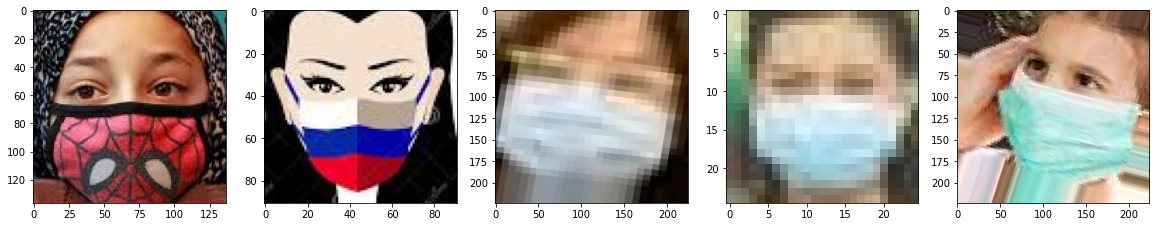

In [11]:
path1='I:\Deep Learning data\Face Mask Dataset\Test\WithMask'

print("Images With Mask")
plt.figure(figsize=(20,10))
for i in range(5):
    file=random.choice(os.listdir(path1))
    img_path=os.path.join(path1,file)
    image=cv2.imread(img_path)
    image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    ax=plt.subplot(1,5,i+1)
    plt.imshow(image)

Images With Mask


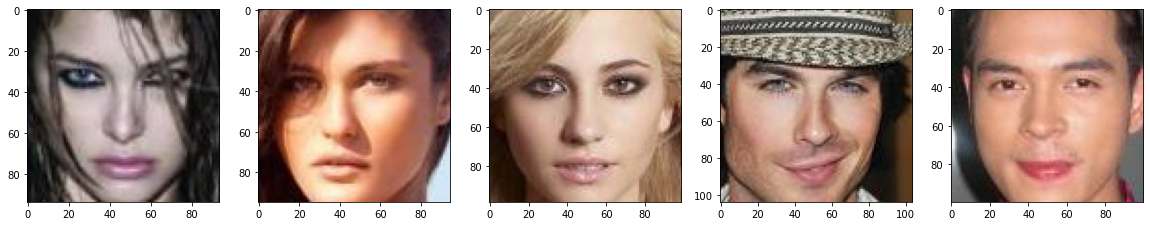

In [12]:
path2='I:\Deep Learning data\Face Mask Dataset\Test\WithoutMask'

print("Images With Mask")
plt.figure(figsize=(20,10))
for i in range(5):
    file=random.choice(os.listdir(path2))
    img_path=os.path.join(path2,file)
    image=cv2.imread(img_path)
    image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    ax=plt.subplot(1,5,i+1)
    plt.imshow(image)

In [13]:
def load_data(image_list,label_list,path):
    classes=['WithMask','WithoutMask']
    for category in classes:
        picList= os.listdir(path+"/"+str(category))
        for pic in tqdm(picList):
            image= cv2.imread(path+"/"+str(category)+"/"+pic)
            image= cv2.resize(image,(128,128))
            image = img_to_array(image)/255.0
            image_list.append(image)
            label_list.append(classes.index(category))
    return image_list,label_list

In [14]:
train_images=[]
train_labels=[]
train_images,train_labels= load_data(train_images,train_labels,traindir)


100%|█████████████████████████████████████████████████████████████████████████████| 5000/5000 [00:08<00:00, 617.34it/s]


In [15]:
val_images = []
val_labels = []
val_images,val_labels = load_data(val_images,val_labels,val_dir)

100%|███████████████████████████████████████████████████████████████████████████████| 400/400 [00:00<00:00, 858.10it/s]


In [16]:
test_images = []
test_labels = []
test_images,test_labels = load_data(test_images,test_labels,test_dir)

100%|███████████████████████████████████████████████████████████████████████████████| 509/509 [00:02<00:00, 180.06it/s]


In [17]:
def convert_to_array(train_images,train_labels):
    images = np.array(train_images)
    labels = np.array(train_labels)
    return images,labels

In [18]:
x_train,y_train= convert_to_array(train_images,train_labels)
x_val,y_val= convert_to_array(val_images,val_labels)
x_test,y_test= convert_to_array(test_images,test_labels)

In [19]:
del train_images
del train_labels
del val_images
del val_labels
del test_images
del test_labels

In [20]:
print(x_train.shape, y_train.shape, type(x_train), x_train.dtype,y_train.dtype)
print(x_val.shape, y_val.shape)
print(x_test.shape, y_test.shape)

(10000, 128, 128, 3) (10000,) <class 'numpy.ndarray'> float32 int32
(800, 128, 128, 3) (800,)
(992, 128, 128, 3) (992,)


In [21]:
print(y_train[650])
print(y_val[650])
print(y_test[650])

0
1
1


In [22]:
y_train= to_categorical(y_train)
y_val= to_categorical(y_val)
y_test= to_categorical(y_test)

In [23]:
print(y_train[650])
print(y_val[650])
print(y_test[650])

[1. 0.]
[0. 1.]
[0. 1.]


In [24]:
augmentation = ImageDataGenerator(  
    height_shift_range= 0.2, 
    width_shift_range=0.2, 
    rotation_range=20,
    shear_range=0.2,
    zoom_range=0.15,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest'
)

In [25]:
file_path=r"I:\Deep Learning data\Face Mask Dataset\models\face_mask_detection.h5"
checkpoint = ModelCheckpoint(file_path,
                             monitor='val_loss',
                             verbose=1,
                             save_best_only=True,
                             mode='auto'
                            )
early = EarlyStopping(monitor="val_loss",
                      mode='auto',
                      patience=10,
                      restore_best_weights=True)
callbacks_list = [checkpoint,early]

In [26]:
model5=Sequential()
model5.add(Conv2D(32,kernel_size=(3,3),activation='relu', input_shape=(128, 128, 3),padding='same'))
model5.add(BatchNormalization())
model5.add(Conv2D(32,kernel_size=(3,3),activation='relu', padding='same'))
model5.add(BatchNormalization())
model5.add(MaxPooling2D((2, 2)))
model5.add(Dropout(0.2))

model5.add(Conv2D(64,kernel_size=(3,3),activation='relu',padding='same'))
model5.add(BatchNormalization())
model5.add(Conv2D(64,kernel_size=(3,3),activation='relu',padding='same'))
model5.add(BatchNormalization())
model5.add(MaxPooling2D((2, 2)))
model5.add(Dropout(0.2))


model5.add(Conv2D(128,kernel_size=(3,3),activation='relu',padding='same'))
model5.add(BatchNormalization())
model5.add(Conv2D(128,kernel_size=(3,3),activation='relu',padding='same'))
model5.add(BatchNormalization())
model5.add(MaxPooling2D((2, 2)))
model5.add(Dropout(0.2))


model5.add(Flatten())
model5.add(Dense(128, activation='relu'))
model5.add(BatchNormalization())
model5.add(Dropout(0.2))
model5.add(Dense(2,activation='softmax'))
model5.summary()      


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 32)      896       
_________________________________________________________________
batch_normalization (BatchNo (None, 128, 128, 32)      128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 128, 128, 32)      9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 128, 128, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 64)        1

In [27]:
INIT_LR=0.0001
EPOCHS=100
BS=32
model5.compile(loss='binary_crossentropy',
               optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001,
               decay= INIT_LR/EPOCHS),
               metrics=['accuracy'])


In [43]:
from sklearn.utils import shuffle
x_val,y_val= shuffle(x_val,y_val)

In [44]:
history = model5.fit(
    augmentation.flow(x_train,y_train,batch_size=BS,shuffle=True),
    steps_per_epoch= len(x_train)//BS,
    validation_data=(x_val,y_val),
    validation_steps= len(x_val)//BS,
    epochs= EPOCHS,
    callbacks=[callbacks_list],
    verbose=1
)

Epoch 1/100
312/312 [==============================] - ETA: 0s - loss: 0.3663 - accuracy: 0.8708
Epoch 00001: val_loss improved from inf to 5.75963, saving model to I:\Deep Learning data\Face Mask Dataset\models\face_mask_detection.h5
312/312 [==============================] - 848s 3s/step - loss: 0.3661 - accuracy: 0.8709 - val_loss: 5.7596 - val_accuracy: 0.5000
Epoch 2/100
312/312 [==============================] - ETA: 0s - loss: 0.1906 - accuracy: 0.9244
Epoch 00002: val_loss improved from 5.75963 to 0.43210, saving model to I:\Deep Learning data\Face Mask Dataset\models\face_mask_detection.h5
312/312 [==============================] - 849s 3s/step - loss: 0.1906 - accuracy: 0.9244 - val_loss: 0.4321 - val_accuracy: 0.8537
Epoch 3/100
312/312 [==============================] - ETA: 0s - loss: 0.1711 - accuracy: 0.9395
Epoch 00003: val_loss improved from 0.43210 to 0.10565, saving model to I:\Deep Learning data\Face Mask Dataset\models\face_mask_detection.h5
312/312 [==============

In [50]:
def plot_learning_curve(history):
    plt.figure(figsize=(12,6))
    plt.subplot(1,2,1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.savefig('./accuracy_curve.png')
    plt.subplot(1,2,2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')

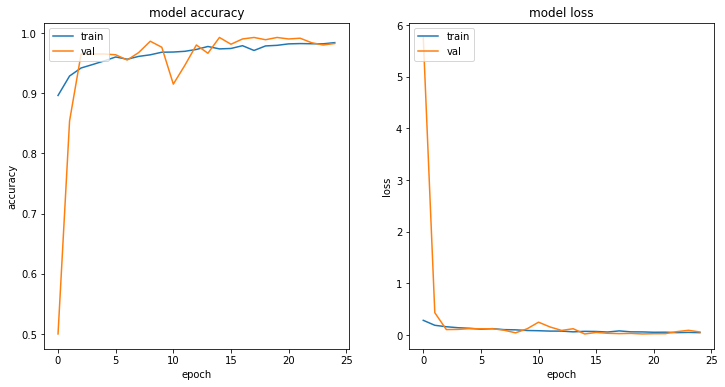

In [51]:
plot_learning_curve(history)
plt.show()

In [22]:
model =load_model(r'I:\Deep Learning data\Face Mask Dataset\models\face_mask_detection.h5')
score=model.evaluate(x_test,y_test)
print("Loss: {} \t\tAccuracy: {}".format(score[0],score[1]))

31/31 [==============================] - 9s 262ms/step - loss: 0.0307 - accuracy: 0.9899
Loss: 0.030670834705233574 		Accuracy: 0.9899193644523621


In [29]:
y_pred = model.predict(x_test,batch_size=BS)
Y_pred = np.argmax(y_pred,axis = 1)
Y_true = np.argmax(y_test,axis = 1)

In [30]:
from sklearn.metrics import classification_report
print(classification_report(Y_true,Y_pred,target_names=['WithMask','WithoutMask']))

              precision    recall  f1-score   support

    WithMask       0.99      0.99      0.99       483
 WithoutMask       0.99      0.99      0.99       509

    accuracy                           0.99       992
   macro avg       0.99      0.99      0.99       992
weighted avg       0.99      0.99      0.99       992



In [31]:
from tensorflow.keras.models import load_model

In [32]:
model =load_model(r'I:\Deep Learning data\Face Mask Dataset\models\face_mask_detection.h5')

In [33]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 128, 128, 32)      896       
_________________________________________________________________
batch_normalization_2 (Batch (None, 128, 128, 32)      128       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 128, 128, 32)      9248      
_________________________________________________________________
batch_normalization_3 (Batch (None, 128, 128, 32)      128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 64, 64, 64)       

In [45]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import PIL
import imutils

In [46]:
y_test[98]

array([1., 0.], dtype=float32)

In [36]:
face = np.expand_dims(x_test[45], axis=0)
(mask, withoutMask) = model.predict(face)[0]
label = "Mask" if mask > withoutMask else "No Mask"
print(label)


Mask


In [37]:
y_test[790]

array([0., 1.], dtype=float32)

In [38]:
face = np.expand_dims(x_test[790], axis=0)
(mask, withoutMask) = model.predict(face)[0]
label = "Mask" if mask > withoutMask else "No Mask"
print(label)

No Mask


In [63]:
path=r'I:\Deep Learning data\Face Mask Dataset\Test\WithMask\422.png'

0.99984837 0.00015162492
With Mask


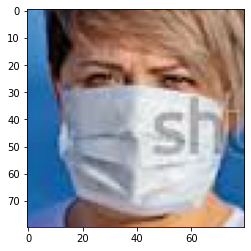

In [65]:
image= cv2.imread(path)
image= cv2.resize(image,(128,128))
image = img_to_array(image)/255.0
image=np.array(image)
image = np.expand_dims(image, axis=0)
(mask, withoutMask) = model.predict(image)[0]
label = "With Mask" if mask > withoutMask else "Without Mask"

print(mask,withoutMask)
print(label)
image_show=PIL.Image.open(path)
plt.imshow(image_show)
plt.show()